In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

diabetes_dataset = pd.read_csv('/Users/astha/Desktop/Diabetes Prediction/Datasets/Dataset2/diabetes_prediction_dataset.csv')

print("\nDisplaying the first 5 rows of the dataset to understand its structure.")
print(diabetes_dataset.head())


Displaying the first 5 rows of the dataset to understand its structure.
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [83]:
# Inspecting the Dataset
print("Dataset Information:")
print(diabetes_dataset.info())

print("\nSummary Statistics:")
print(diabetes_dataset.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516

In [84]:
# Checking for Missing Values
print("\nMissing Values:")
print(diabetes_dataset.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [85]:
# Label Encoding for Categorical Features
label_encoder = LabelEncoder()

diabetes_dataset['gender'] = label_encoder.fit_transform(diabetes_dataset['gender'])
diabetes_dataset['smoking_history'] = label_encoder.fit_transform(diabetes_dataset['smoking_history'])

print(diabetes_dataset.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


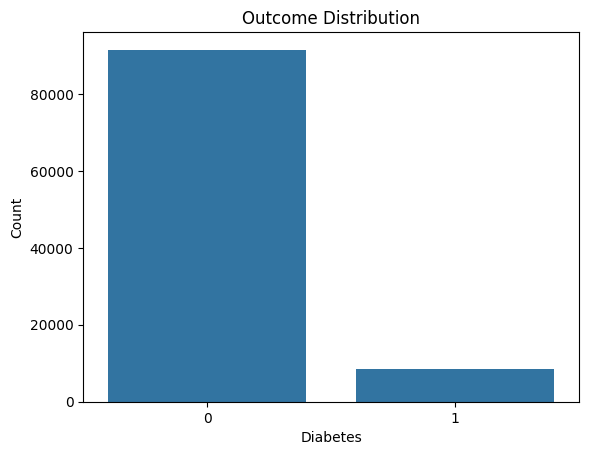

In [86]:
# Outcome Distribution
sns.countplot(data=diabetes_dataset, x='diabetes')
plt.title('Outcome Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

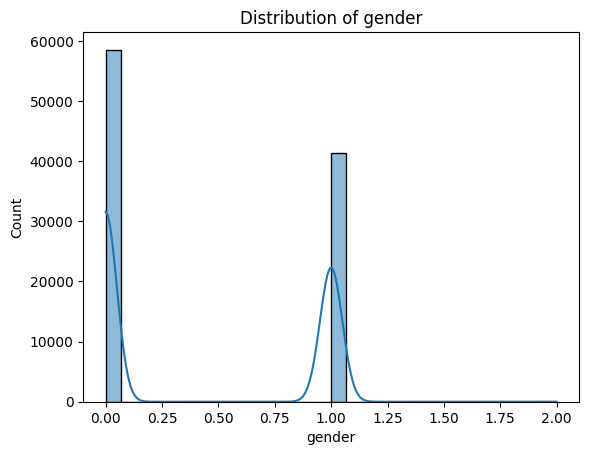

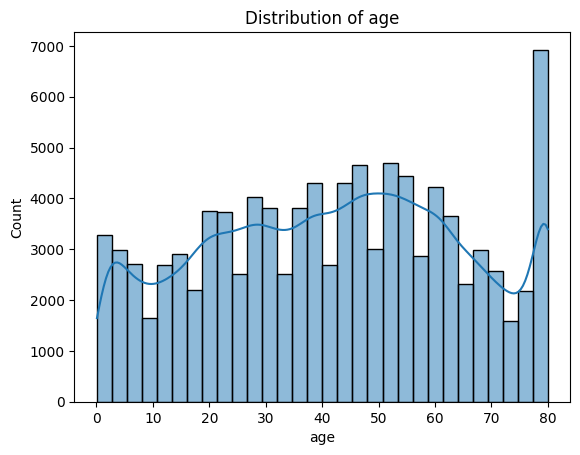

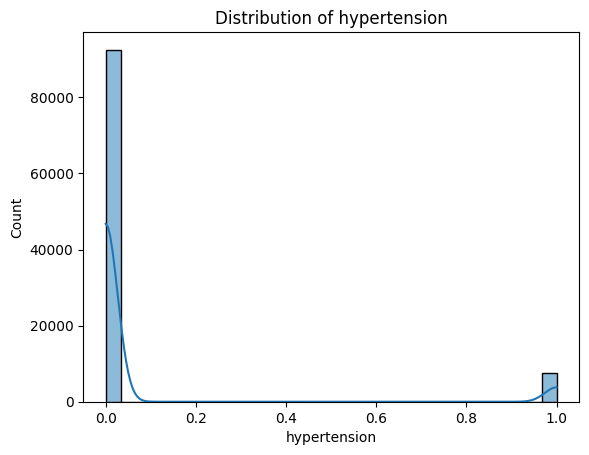

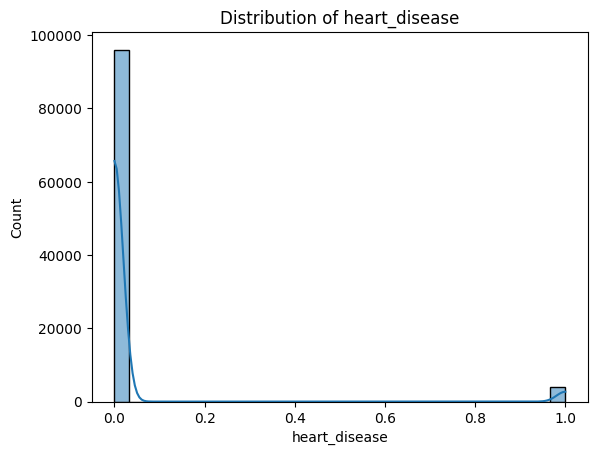

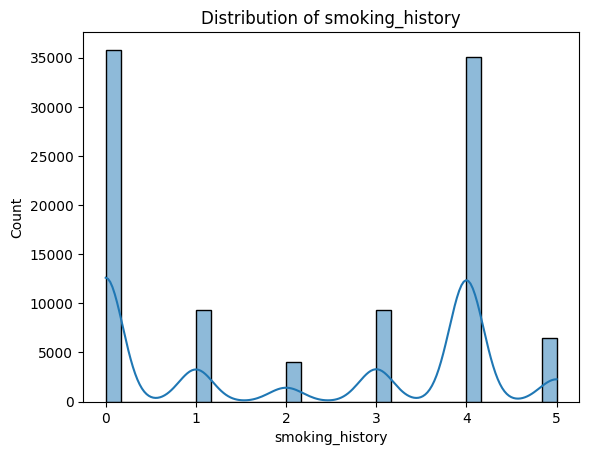

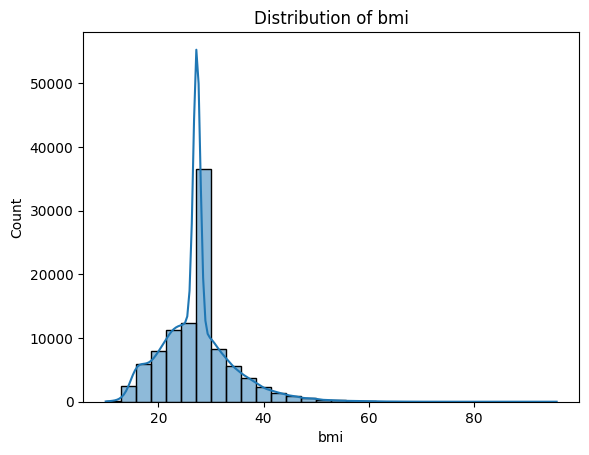

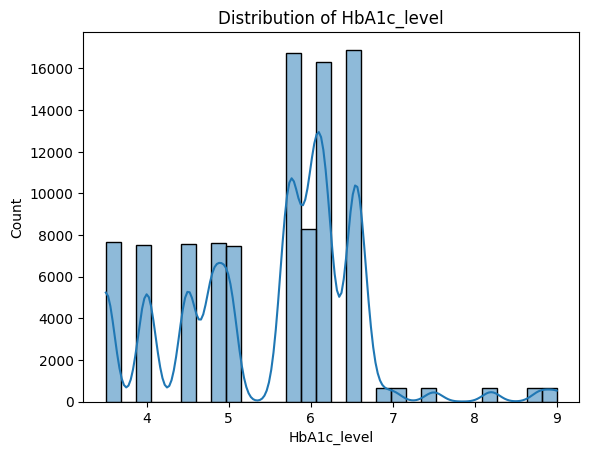

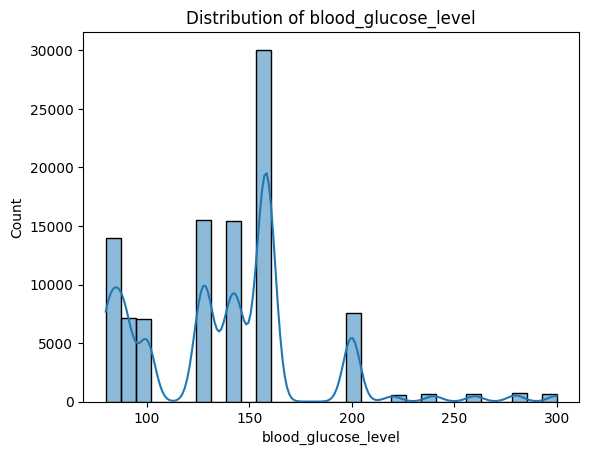

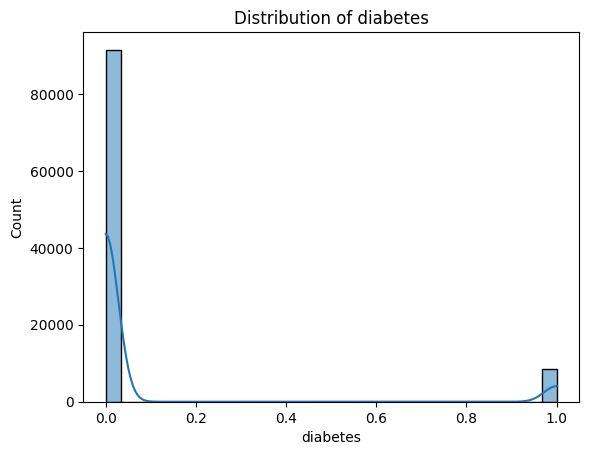

In [87]:
# Feature Distributions
numerical_features = diabetes_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_features:
    plt.figure()
    sns.histplot(diabetes_dataset[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

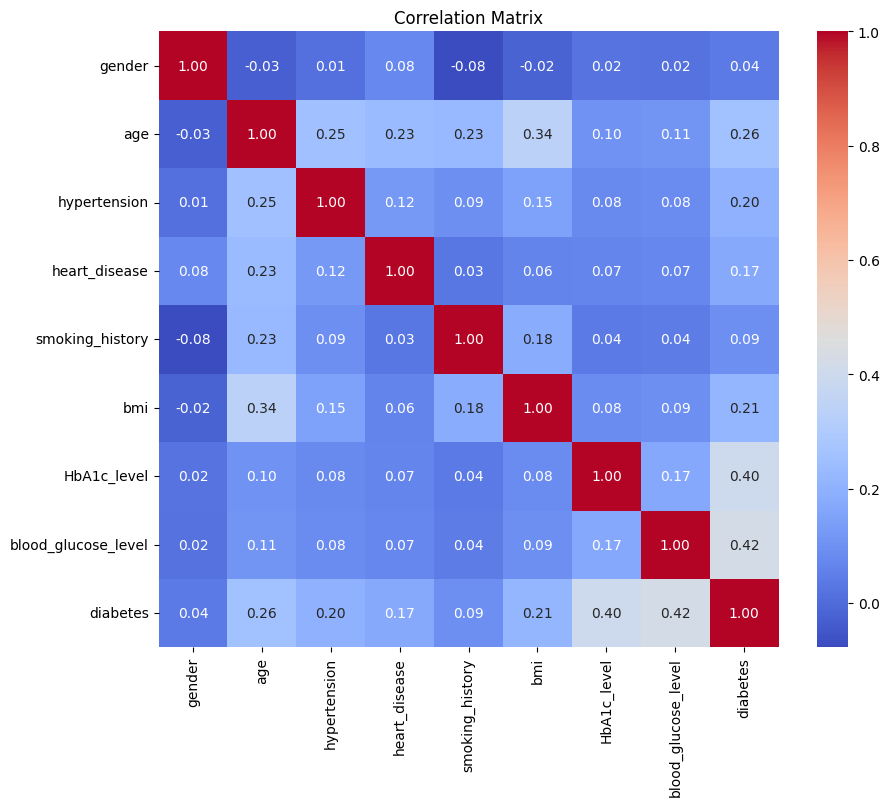

In [88]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [89]:
# Splitting features and labels
X = diabetes_dataset.drop(columns='diabetes', axis=1)
Y = diabetes_dataset['diabetes']

In [90]:
# Scal the Features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [91]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print("\nTrain and Test shapes:", X_train.shape, X_test.shape)


Train and Test shapes: (80000, 8) (20000, 8)


In [92]:
# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=2)
rf.fit(X_train, Y_train)

ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)

accuracy_train = accuracy_score(Y_train, ypred_train)
accuracy_test = accuracy_score(Y_test, ypred_test)

print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")

Training Accuracy: 99.92%
Testing Accuracy: 97.14%



Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.70      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



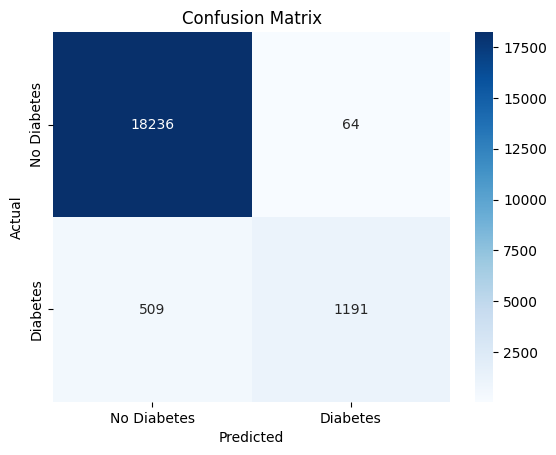

In [93]:
# Classification Report
print("\nClassification Report (Testing Data):")
print(classification_report(Y_test, ypred_test))

# Confusion Matrix
cm = confusion_matrix(Y_test, ypred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC-AUC Score: 0.97


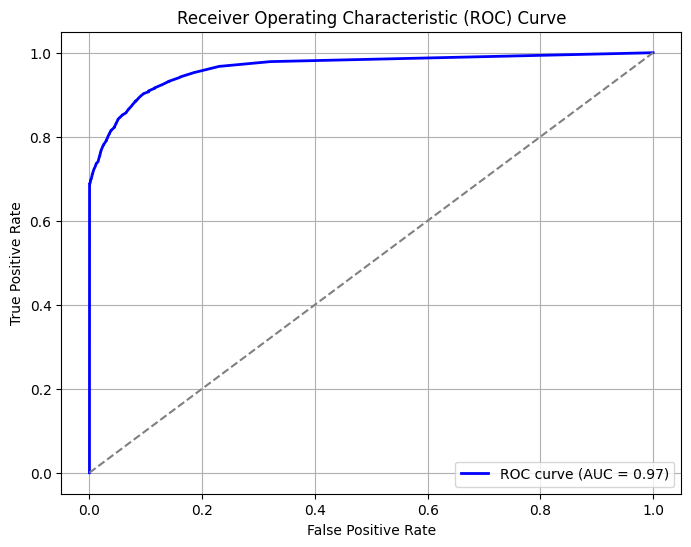

In [94]:
# ROC-AUC Score
from sklearn.metrics import roc_curve, auc

roc_auc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()